# Plotting the incidences of BW counties

In [1]:
import pandas as pd    # Pandas is a library to analyse various data structures
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Here we read the csv-file holding the data.
# Note: the separator is a ; instead of a comma, all NA-values gave to be skipped
df_csv = pd.read_csv('./Infizierte.csv', sep=';',na_filter=False)
keys=df_csv.keys()
# Let us pack the counties names into a dictionary and number them
# e.g. {'Biberach': 1}
nkreise=np.arange(len(df_csv.to_numpy()[:,0]))
dict_kreise = dict(zip(df_csv.to_numpy()[:,0],nkreise))
#
df_csv = pd.read_csv('./Infizierte220111.csv',header=None, sep=';',na_filter=False)
data=df_csv.to_numpy()
#
dfEWZ_csv = pd.read_csv('./EWZLandkreise.csv', sep=';',na_filter=False)
dict_EWZkreise = dict(dfEWZ_csv.to_numpy())

for kreisname in dict_EWZkreise.keys():
    dict_EWZkreise[kreisname] = {"index": dict_kreise[kreisname], "einwohner": dict_EWZkreise[kreisname]}

In [33]:
# transform data to float
irange=np.arange(data.shape[0])
jrange=np.arange(1,data.shape[1])
datafloat=np.zeros(data.shape)
dataint=np.zeros(data.shape)
for i in irange: 
    for j in jrange:
        if data[i,j] =='': 
            datafloat[i,j]=0.
            dataint[i,j]=0
        else:
            datafloat[i,j]=float(data[i,j])
            dataint[i,j]=int(data[i,j])
#
kreisliste = ['Heidelberg (Stadtkreis)', 'Freiburg im Breisgau (Stadtkreis)']

<IPython.core.display.Javascript object>


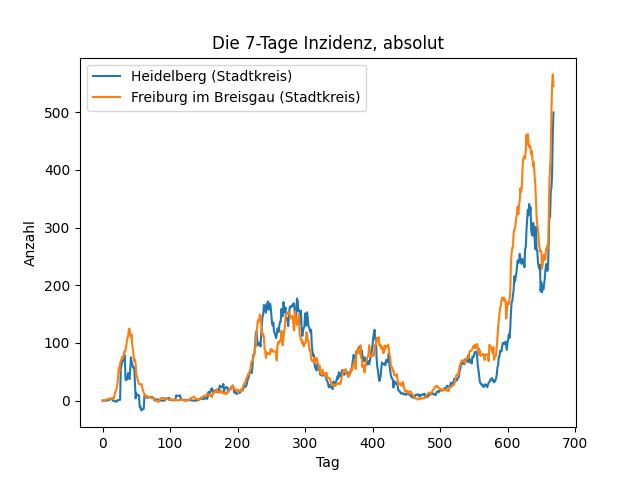

[Text(0, 0.5, 'Anzahl')]

In [34]:
%matplotlib notebook
fig, ax = plt.subplots() # let us plot the data
for kreis in kreisliste:
#for i in np.arange(44):
    entry = dict_EWZkreise[kreis]
    factor=1.e5/entry["einwohner"]
    #factor = 1.
    #y = np.flip(datafloat[dict_kreise[kreis]])
    y = np.flip(datafloat[entry["index"],1:])
    y14 = np.roll(y,7)
    y14[:13] = 0
    delta = y  - y14
    ax.plot(factor*delta[0:], label=kreis)
    #ax.plot(y, label=kreis)
#
ax.legend()
ax.set_title('Die 7-Tage Inzidenz, absolut')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [35]:
dict_kreise

{'Alb-Donau-Kreis': 0,
 'Biberach': 1,
 'Böblingen': 2,
 'Bodenseekreis': 3,
 'Breisgau-Hochschwarzwald': 4,
 'Calw': 5,
 'Emmendingen': 6,
 'Enzkreis': 7,
 'Esslingen': 8,
 'Freudenstadt': 9,
 'Göppingen': 10,
 'Heidenheim': 11,
 'Heilbronn': 12,
 'Hohenlohekreis': 13,
 'Karlsruhe': 14,
 'Konstanz': 15,
 'Lörrach': 16,
 'Ludwigsburg': 17,
 'Main-Tauber-Kreis': 18,
 'Neckar-Odenwald-Kreis': 19,
 'Ortenaukreis': 20,
 'Ostalbkreis': 21,
 'Rastatt': 22,
 'Ravensburg': 23,
 'Rems-Murr-Kreis': 24,
 'Reutlingen': 25,
 'Rhein-Neckar-Kreis': 26,
 'Rottweil': 27,
 'Schwäbisch Hall': 28,
 'Schwarzwald-Baar-Kreis': 29,
 'Sigmaringen': 30,
 'Tübingen': 31,
 'Tuttlingen': 32,
 'Waldshut': 33,
 'Zollernalbkreis': 34,
 'Baden-Baden (Stadtkreis)': 35,
 'Freiburg im Breisgau (Stadtkreis)': 36,
 'Heidelberg (Stadtkreis)': 37,
 'Heilbronn (Stadtkreis)': 38,
 'Karlsruhe (Stadtkreis)': 39,
 'Mannheim (Stadtkreis)': 40,
 'Pforzheim (Stadtkreis)': 41,
 'Stuttgart': 42,
 'Ulm (Stadtkreis)': 43}

In [36]:
EWZahl = np.ones(44)
EWZahl[36] = 230940
EWZahl[6] = 166862
EWZahl[20] = 432580

In [ ]:
df_dict_kreise = pd.DataFrame(dict_kreise.items())
df_dict_kreise.to_csv("Landkreise.dat",sep='\t')

In [7]:
dict_kreise

{'Alb-Donau-Kreis': 0,
 'Biberach': 1,
 'Böblingen': 2,
 'Bodenseekreis': 3,
 'Breisgau-Hochschwarzwald': 4,
 'Calw': 5,
 'Emmendingen': 6,
 'Enzkreis': 7,
 'Esslingen': 8,
 'Freudenstadt': 9,
 'Göppingen': 10,
 'Heidenheim': 11,
 'Heilbronn': 12,
 'Hohenlohekreis': 13,
 'Karlsruhe': 14,
 'Konstanz': 15,
 'Lörrach': 16,
 'Ludwigsburg': 17,
 'Main-Tauber-Kreis': 18,
 'Neckar-Odenwald-Kreis': 19,
 'Ortenaukreis': 20,
 'Ostalbkreis': 21,
 'Rastatt': 22,
 'Ravensburg': 23,
 'Rems-Murr-Kreis': 24,
 'Reutlingen': 25,
 'Rhein-Neckar-Kreis': 26,
 'Rottweil': 27,
 'Schwäbisch Hall': 28,
 'Schwarzwald-Baar-Kreis': 29,
 'Sigmaringen': 30,
 'Tübingen': 31,
 'Tuttlingen': 32,
 'Waldshut': 33,
 'Zollernalbkreis': 34,
 'Baden-Baden (Stadtkreis)': 35,
 'Freiburg im Breisgau (Stadtkreis)': 36,
 'Heidelberg (Stadtkreis)': 37,
 'Heilbronn (Stadtkreis)': 38,
 'Karlsruhe (Stadtkreis)': 39,
 'Mannheim (Stadtkreis)': 40,
 'Pforzheim (Stadtkreis)': 41,
 'Stuttgart': 42,
 'Ulm (Stadtkreis)': 43}

In [39]:
dict_EWZkreise['Konstanz, Landkreis']

286876

In [34]:
a=np.arange(8)

In [36]:
a.reshape((2,4)).T

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

In [53]:
dict_kreise

{'Alb-Donau-Kreis': 0,
 'Biberach': 1,
 'Böblingen': 2,
 'Bodenseekreis': 3,
 'Breisgau-Hochschwarzwald': 4,
 'Calw': 5,
 'Emmendingen': 6,
 'Enzkreis': 7,
 'Esslingen': 8,
 'Freudenstadt': 9,
 'Göppingen': 10,
 'Heidenheim': 11,
 'Heilbronn': 12,
 'Hohenlohekreis': 13,
 'Karlsruhe': 14,
 'Konstanz': 15,
 'Lörrach': 16,
 'Ludwigsburg': 17,
 'Main-Tauber-Kreis': 18,
 'Neckar-Odenwald-Kreis': 19,
 'Ortenaukreis': 20,
 'Ostalbkreis': 21,
 'Rastatt': 22,
 'Ravensburg': 23,
 'Rems-Murr-Kreis': 24,
 'Reutlingen': 25,
 'Rhein-Neckar-Kreis': 26,
 'Rottweil': 27,
 'Schwäbisch Hall': 28,
 'Schwarzwald-Baar-Kreis': 29,
 'Sigmaringen': 30,
 'Tübingen': 31,
 'Tuttlingen': 32,
 'Waldshut': 33,
 'Zollernalbkreis': 34,
 'Baden-Baden (Stadtkreis)': 35,
 'Freiburg im Breisgau (Stadtkreis)': 36,
 'Heidelberg (Stadtkreis)': 37,
 'Heilbronn (Stadtkreis)': 38,
 'Karlsruhe (Stadtkreis)': 39,
 'Mannheim (Stadtkreis)': 40,
 'Pforzheim (Stadtkreis)': 41,
 'Stuttgart': 42,
 'Ulm (Stadtkreis)': 43}

In [54]:
dict_EWZkreise

{'Rhein-Neckar-Kreis': 548233,
 'Ludwigsburg, Landkreis': 544971,
 'Esslingen, Landkreis': 533617,
 'Karlsruhe, Landkreis': 446852,
 'Ortenaukreis': 432580,
 'Rems-Murr-Kreis': 427286,
 'Böblingen, Landkreis': 392898,
 'Heilbronn, Landkreis': 346363,
 'Ostalbkreis': 314294,
 'Mannheim': 309721,
 'Karlsruhe': 308436,
 'Reutlingen, Landkreis': 287497,
 'Konstanz, Landkreis': 286876,
 'Ravensburg, Landkreis': 285888,
 'Breisgau-Hochschwarzwald, Landkreis': 264867,
 'Göppingen, Landkreis': 258781,
 'Rastatt, Landkreis': 232091,
 'Freiburg im Breisgau': 230940,
 'Lörrach, Landkreis': 228842,
 'Tübingen, Landkreis': 228471,
 'Bodenseekreis': 217901,
 'Schwarzwald-Baar-Kreis': 212872,
 'Biberach, Landkreis': 202250,
 'Enzkreis': 199752,
 'Alb-Donau-Kreis': 198204,
 'Schwäbisch Hall, Landkreis': 197860,
 'Zollernalbkreis': 189862,
 'Waldshut, Landkreis': 171237,
 'Emmendingen, Landkreis': 166862,
 'Calw, Landkreis': 160149,
 'Heidelberg, kreisfreie Stadt': 158741,
 'Neckar-Odenwald-Kreis': 143

In [58]:
for key in kreisliste:
    print(dict_kreise[key])

40
14
35
20
6
36
